Import the relevant packages, define the device, and fetch the JSON file that contains information about the images to
download:

In [ ]:
!pip install -qU openimages torch_snippets urllib3

In [ ]:
import torch

In [ ]:
import torchvision

In [ ]:
import requests

url = 'https://storage.googleapis.com/localized-narratives/annotations/open_images_train_v6_captions.jsonl'
response = requests.get(url)

with open('open_images_train_captions.jsonl', 'wb') as f:
    f.write(response.content)


In [ ]:
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Import the relevant packages, define the device
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Running on device: ", device)


Running on device:  cuda

Loop through the content of the JSON file and fetch the information of the first 100,000 images

In [ ]:
with open('open_images_train_captions.jsonl', 'r') as json_file:
    # rest of the code goes here
    json_list = json_file.read().split('\n')
    np.random.shuffle(json_list)
    data = []
    N = 10000
    for ix, json_str in Tqdm(enumerate(json_list), N):
        if ix == N: break
    try:
        result = json.loads(json_str)
        x = pd.DataFrame.from_dict(result, orient='index').T
        data.append(x)
    except:
        pass


100%|██████████| 10000/10000 [00:00<00:00, 967566.50it/s]


A sample of the information obtained from the JSON file is as follows:

In [ ]:
result

{'dataset_id': 'open_images',
 'image_id': '704ff7ed7553907b',
 'annotator_id': 68,
 'caption': 'This picture is clicked outside. On the right there is a person holding a flag and smiling and standing on the ground. On the left we can see a man wearing helmet, holding an arrow and standing on the ground. In the background we can see the tree and some other objects and we can see the windows and the brick wall of the building.'}

Split the dataframe (data) into training and validation datasets:

In [ ]:
# Split the dataframe (data) into training and validation datasets
np.random.seed(10)

data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data),p=[0.95,0.05])
data.to_csv('data.csv', index=False)

In [ ]:
!mkdir -p train-images val-images

Download the images corresponding to the image IDs fetched from the JSON file:


In [ ]:
# Download the images corresponding to the image IDs fetched from the JSON file:
from openimages.download import _download_images_by_id

subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './train-images/')

subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './val-images/')


100%|██████████| 1/1 [00:00<00:00,  2.14it/s]
0it [00:00, ?it/s]


## 2. Create a vocabulary of all the unique words present in all the captions in the dataframe:

In [ ]:
!pip install torchtext

In [ ]:
!pip install --upgrade torchtext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.6.0
    Uninstalling torchtext-0.6.0:
      Successfully uninstalled torchtext-0.6.0


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
!apt-get -qq install -y graphviz

In [ ]:
!pip install pydot

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
pip install torchtext==0.6.0

  Using cached torchtext-0.6.0-py3-none-any.whl (64 kB)
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [ ]:
with open('/content/open_images_train_captions.jsonl', 'r') as json_file:
    json_list = json_file.read().split('\n')

np.random.shuffle(json_list)
data = []
N = 10000 # Doing 10000 instead of 100000 because cuda runs out of memory

for ix, json_str in Tqdm(enumerate(json_list), N):
    if ix == N: break
    try:
        result = json.loads(json_str)
        x = pd.DataFrame.from_dict(result, orient='index').T
        data.append(x)
    except:
        pass


100%|██████████| 10000/10000 [00:07<00:00, 1281.56it/s]


In [ ]:
# Split the dataframe (data) into training and validation datasets
np.random.seed(10)

data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data),p=[0.95,0.05])
data.to_csv('data.csv', index=False)

In [ ]:
# Download the images corresponding to the image IDs fetched from the JSON file:
from openimages.download import _download_images_by_id

subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './train-images/')

subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './val-images/')


100%|██████████| 470/470 [00:07<00:00, 65.34it/s]


In [ ]:
!pip install pycocotools

In [ ]:
# A vocabulary object is something that can map every word in all the captions to a unique integer and vice versa
from torchtext.data import Field
from pycocotools.coco import COCO
from collections import defaultdict
captions = Field(sequential=False, init_token='', eos_token='')

all_captions = data[data['train']]['caption'].tolist()
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
all_tokens = [w for sublist in all_tokens for w in sublist]

captions.build_vocab(all_tokens)


In [ ]:
captions = Field(sequential=False, init_token='', eos_token='')

all_captions = data[data['train']]['caption'].tolist()
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
all_tokens = [w for sublist in all_tokens for w in sublist]

captions.build_vocab(all_tokens)

In [ ]:
# Captions vocabulary components
class Vocab: pass

vocab = Vocab()
captions.vocab.itos.insert(0, '')
vocab.itos = captions.vocab.itos

vocab.stoi = defaultdict(lambda:captions.vocab.itos.index(''))
vocab.stoi[''] = 0

for s,i in captions.vocab.stoi.items():
    vocab.stoi[s] = i+1


## 3. Define the dataset class – CaptioningDataset:

In [ ]:
# Dataset class
from torchvision import transforms

class CaptioningData(Dataset):
    def __init__(self, root, df, vocab):
        self.df = df.reset_index(drop=True)
        self.root = root
        self.vocab = vocab

        self.transform = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
        )

    # Returns one data pair (image and caption)
    def __getitem__(self, index):
        row = self.df.iloc[index].squeeze()
        id = row.image_id

        image_path = f'{self.root}/{id}.jpg'
        image = Image.open(os.path.join(image_path)).convert('RGB')

        caption = row.caption

        tokens = str(caption).lower().split()
        target = []
        target.append(vocab.stoi[''])
        target.extend([vocab.stoi[token] for token in tokens])
        target.append(vocab.stoi[''])
        target = torch.Tensor(target).long()

        return image, target, caption

    def choose(self):
        return self[np.random.randint(len(self))]

    def __len__(self):
        return len(self.df)

    # Creates batch of captions and padds captions to be equal length
    def collate_fn(self, data):
        data.sort(key=lambda x: len(x[1]), reverse=True)
        images, targets, captions = zip(*data)
        images = torch.stack([self.transform(image) for image in images], 0)

        lengths = [len(tar) for tar in targets]
        _targets = torch.zeros(len(captions), max(lengths)).long()

        for i, tar in enumerate(targets):
            end = lengths[i]
            _targets[i, :end] = tar[:end]

        return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)


## 4. Define the training and validation dataset and data loaders:

In [ ]:
#Define the training and validation dataset and data loaders
trn_ds = CaptioningData('train-images', data[data['train']], vocab)

val_ds = CaptioningData('val-images', data[~data['train']], vocab)

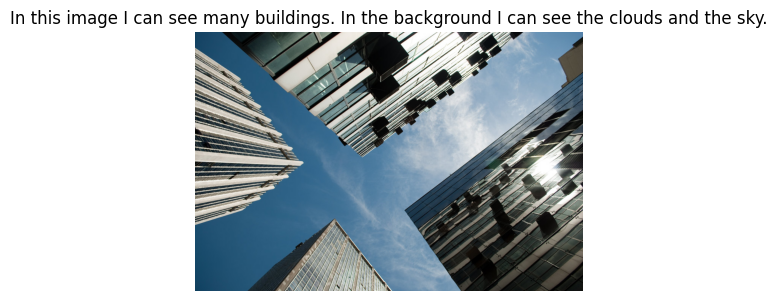

tensor([  2,   5,  13,  16,  17,  10,   9,  68, 149,   5,   3,  18,  17,  10,
          9,   3, 190,   6,   3,  31,   2])

In [ ]:
# Show sample image and caption
image, target, caption = trn_ds.choose()
show(image, title=caption, sz=5); print(target)


In [ ]:
# Create the dataloaders for the datasets
trn_dl = DataLoader(trn_ds, 32, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, collate_fn=val_ds.collate_fn)

#6. Define the network Class

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models

In [ ]:
# The network class - EncoderCNN
class EncoderCNN(nn.Module):

    # Load the pretrained ResNet-152 and replace top fc layer
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)

        # Felete the last fc layer.
        modules = list(resnet.children())[:-1]

        # Connect it to a linear layer
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)

        # Pass it through batch normalization
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    # Extract feature vectors from input images
    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images)

        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))

        return features

In [ ]:
# Creating encoder instance
encoder = EncoderCNN(256).to(device)


In [ ]:
# Define the decoder architecture – DecoderRNN
class DecoderRNN(nn.Module):

    # Set the hyper-parameters and build the layers
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=80):

        super(DecoderRNN, self).__init__()

        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length

    # Decode image feature vectors and generates captions
    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)

        packed = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True)

        outputs, _ = self.lstm(packed)
        outputs = self.linear(outputs[0])
        return outputs

    #Generate captions for given image features using greedy search
    def predict(self, features, states=None):
        sampled_ids = []
        inputs = features.unsqueeze(1)

        for i in range(self.max_seq_length):
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)

            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            _, predicted = outputs.max(1) # predicted: (batch_size)

            sampled_ids.append(predicted)

            inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)


        sampled_ids = torch.stack(sampled_ids, 1) # sampled_ids: (batch_size, max_seq_length)

        # convert predicted tokens to strings
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()
            sampled_caption = []

            for word_id in sampled_id:
                word = vocab.itos[word_id]
                sampled_caption.append(word)

                if word == '':
                    break

            sentence = ' '.join(sampled_caption)
            sentences.append(sentence)

        return sentences


#7. Define the functions to train on a batch of data

In [ ]:
# Trains on a single batch of data
def train_batch(data, encoder, decoder, optimizer, criterion):
    encoder.train()
    decoder.train()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)

    decoder.zero_grad()
    encoder.zero_grad()
    loss.backward()
    optimizer.step()

    return loss


#8. Define the function to validate on a batch of data

In [ ]:
# Validate on a batch of data
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    encoder.eval()
    decoder.eval()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)

    loss = criterion(outputs, targets)
    return loss


#9. Define the model objects and the loss function, and optimizer

In [ ]:
# Define encoder, decoder, loss function, and optimizer
encoder = EncoderCNN(256).to(device)
decoder = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)
criterion = nn.CrossEntropyLoss()

params = list(decoder.parameters()) + \
         list(encoder.linear.parameters()) + \
         list(encoder.bn.parameters())

optimizer = torch.optim.AdamW(params, lr=1e-3)

n_epochs = 5
log = Report(n_epochs)


#10. Train the model over increasing epochs

EPOCH: 1.000  val_loss: 2.698  trn_loss: 3.346  (322.46s - 1289.82s remaining)
EPOCH: 2.000  val_loss: 2.468  trn_loss: 2.517  (625.09s - 937.63s remaining)
EPOCH: 3.000  val_loss: 2.341  trn_loss: 2.284  (926.48s - 617.65s remaining)
EPOCH: 4.000  val_loss: 2.304  trn_loss: 2.127  (1227.88s - 306.97s remaining)
EPOCH: 5.000  val_loss: 2.297  trn_loss: 2.093  (1525.96s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 1808.14it/s]


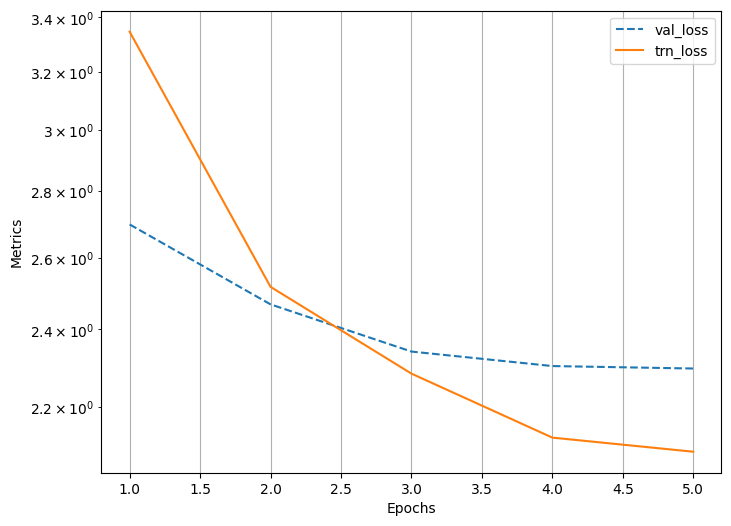

In [ ]:
# Train the model over increasing epochs
for epoch in range(n_epochs):
    if epoch == 3: optimizer = torch.optim.AdamW(params, lr=1e-4)

    N = len(trn_dl)
    for i, data in enumerate(trn_dl):
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, trn_loss=trn_loss, end='\r')

    N = len(val_dl)

    for i, data in enumerate(val_dl):
        val_loss = validate_batch(data, encoder, decoder, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, val_loss=val_loss, end='\r')

    log.report_avgs(epoch+1)

log.plot_epochs(log=True)

#11. Define a function that generates predictions given an image

In [ ]:
#Generates predictions given an image
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        tfm_image = transform(image)[None]

    return image, tfm_image

In [ ]:
def load_image_and_predict(image_path):
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                    ])

    org_image, tfm_image = load_image(image_path, transform)
    image_tensor = tfm_image.to(device)

    encoder.eval()
    decoder.eval()

    feature = encoder(image_tensor)
    sentence = decoder.predict(feature)[0]

    show(org_image, title=sentence)
    return sentence


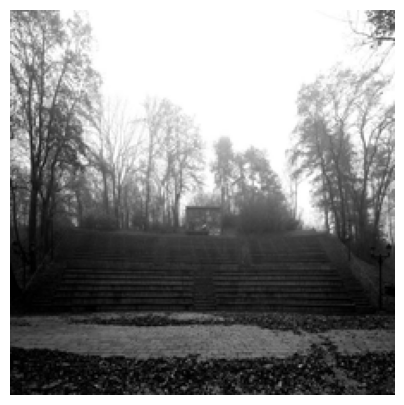

''

In [ ]:
# Predict an image
files = Glob('val-images')
load_image_and_predict(choose(files))